# Model Complexity: Linear Model Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> ## Data

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
X = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y = pd.Series(boston['target'])

In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

> ## Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2, 
    random_state = 1899) # make the result consistent

> ## Ridge Regression

In [ ]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_c:
  ridgereg = Ridge(alpha = i)
  ridgereg.fit(X_train,y_train)

  y_predict_train = ridgereg.predict(X_train)
  training_mse.append(mean_squared_error(y_train,y_predict_train))

  y_predict_test = ridgereg.predict(X_test)
  mse_score = mean_squared_error(y_test,y_predict_test)
  testing_mse.append(mse_score)

  if score > -mse_score:
    score = mse_score
    best_c = i

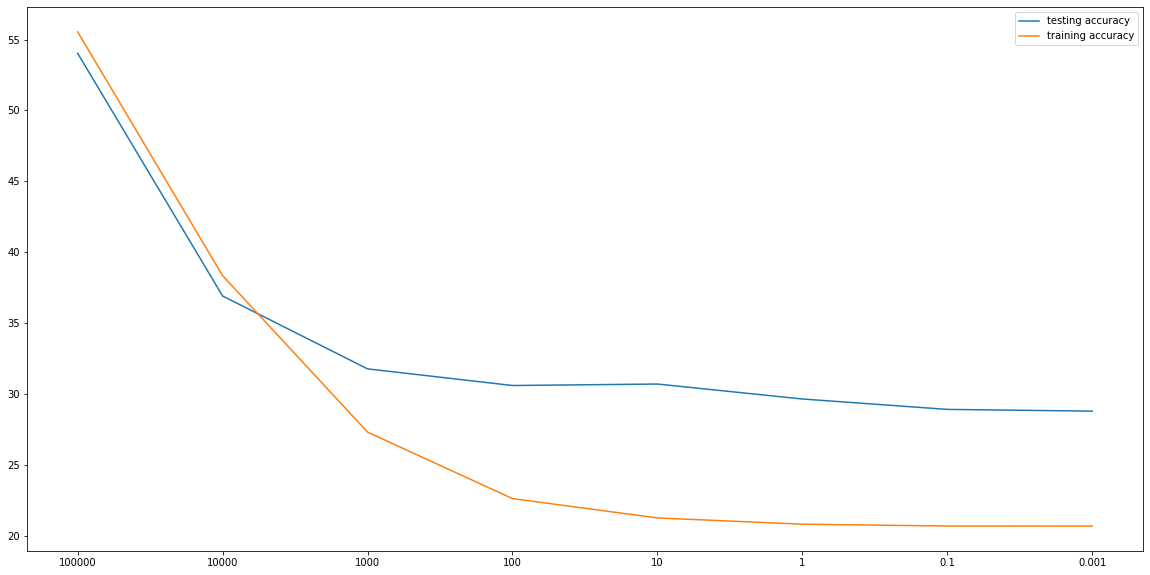

In [ ]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(length,hyperparam_c)
plt.show()

In [ ]:
print('best c:', best_c)
print('mse:', score)

best c: 0.001
mse: 28.778402778052957


In [ ]:
ridgereg = Ridge(alpha=best_c) 
ridgereg.fit(X_train, y_train) 

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)

In [ ]:
coef_ridgereg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':ridgereg.coef_
})

In [ ]:
coef_ridgereg

,feature_names,feature coef
0,CRIM,-0.123098
1,ZN,0.027489
2,INDUS,0.040234
3,CHAS,1.676822
4,NOX,-14.800396
5,RM,4.324093
6,AGE,0.002115
7,DIS,-1.253837
8,RAD,0.328548
9,TAX,-0.014321


In [ ]:
print('mse train:',mean_squared_error(y_train,y_reg_train))
print('mse test:',mean_squared_error(y_test,y_reg_test))

mse train: 20.664301374310284
mse test: 28.778402778052957


1. When alpha set to high value the model is very underfitting becasue both mse in training set and test set are large and it also means that the model is too simple
1. lower alpha can decrese the mse for both training set  and test set until mse in training slighly lower than mse in test set
1. the best alpha for this case is 0.001 with 28.778 mse

> ## Lasso Regression

In [ ]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_c:
  lassoreg = Lasso(alpha = i)
  lassoreg.fit(X_train,y_train)

  y_predict_train = lassoreg.predict(X_train)
  training_mse.append(mean_squared_error(y_train,y_predict_train))

  y_predict_test = lassoreg.predict(X_test)
  mse_score = mean_squared_error(y_test,y_predict_test)
  testing_mse.append(mse_score)

  if score > -mse_score:
    score = mse_score
    best_c = i

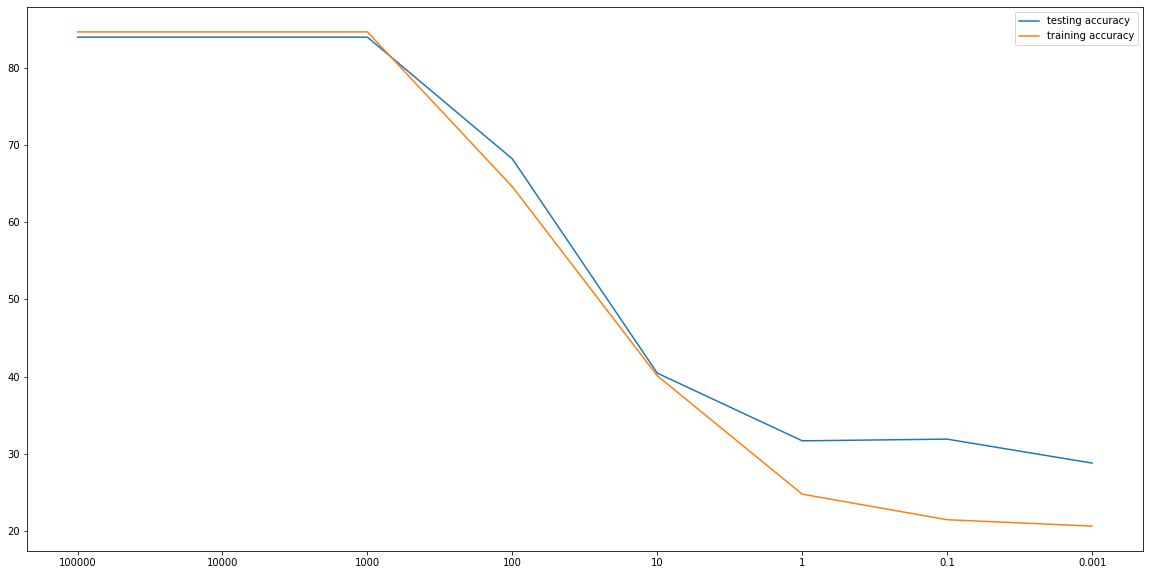

In [ ]:
length = range(len(hyperparam_c))

plt.figure(figsize = (20,10))
sns.lineplot(length,testing_mse)
sns.lineplot(length,training_mse)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(length,hyperparam_c)
plt.show()

In [ ]:
print('best c:', best_c)
print('mse:', score)

best c: 0.001
mse: 28.82051128409872


In [ ]:
lassoreg = Lasso(alpha=best_c) 
lassoreg.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [ ]:
coef_lassoreg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':lassoreg.coef_
})

In [ ]:
coef_lassoreg

,feature_names,feature coef
0,CRIM,-0.122920
1,ZN,0.027515
2,INDUS,0.038746
3,CHAS,1.655566
4,NOX,-14.470963
5,RM,4.324770
6,AGE,0.001868
7,DIS,-1.248666
8,RAD,0.327883
9,TAX,-0.014347


In [ ]:
print('mse train:',mean_squared_error(y_train,y_reg_train))
print('mse test:',mean_squared_error(y_test,y_reg_test))

mse train: 20.664674253173075
mse test: 28.82051128409872


1. When alpha set to high value the model is very underfitting becasue both mse in training set and test set are large and it also means that the model is too simple
1. lower alpha can decrese the mse for both training set  and test set until mse in training slighly lower than mse in test set
1. the best alpha for this case is 0.001 with 28.8205 mse